In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [17]:
x = df.iloc[:, [2, 3]]
y = df.iloc[:, -1]

In [18]:
# dado que ahora tenemos hartos datos, volvemos a usar datos de entrenamiento y datos de testeo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [19]:
# dado que las variables "Age" y "EstimatedSalary" tienen magnitudes muy diferentes, vamos a escalar las variables
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
x_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [20]:
# ahora si hacemos la regresión logística
from sklearn.linear_model import LogisticRegression

In [21]:
clasificador = LogisticRegression(random_state=0)
clasificador.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [22]:
# ahora hacemos la prediccion y la comprobacion de si la prediccion fue buena
y_pred = clasificador.predict(x_test)
from sklearn.metrics import confusion_matrix
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[65,  3],
       [ 8, 24]])

la matriz de confusion nos dice que tan correcta fue la prediccion  
65 personas no compraron y se predijo que no iban a comprar
24 personas compraron y se predijo que iban a comprar  
pero, 8 personas compraron y se predijo que no iban a comprar  
y 3 personas no compraron y se predijo que comprarian  
  
(al menos eso entendí)

/home/tomilee/.local/lib/python3.8/site-packages/sklearn/inspection/_plot/decision_boundary.py:152: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


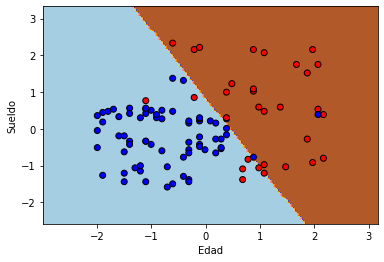

In [59]:
# podemos graficar la regresion logística 
# en la clase habia mucho texto, pero encontré esta funcion en sklearn () advertencia, tener cuidado porque está en la rama inestable de sklearn (version 1.1 creo)
# la version estable es 1.0.2 creo, instalé la version inestable pa usar esto
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    clasificador,
    x_train,
    cmap=plt.cm.Paired,
    response_method="predict",
    #plot_method="pcolormesh",
    shading="auto",
    # xlabel="Sepal length",
    # ylabel="Sepal width",
    #eps=0.5,
)

# lo anterior solo plotea la linea y colorea los espacios, aqui pongo los puntos
# creo una lista de colores a partir de y_test
colores = ["red" if x != 0 else "blue" for x in y_test]
# aqui grafico usando la lista de colores (esdecolors="k" esta de bonito)
plt.scatter(x_test[:, 0], x_test[:, 1], color = colores, edgecolors="k")
plt.xlabel("Edad")
plt.ylabel("Sueldo")
plt.show()

podemos ver los puntos que estan en su lugar correcto, pero vemos puntos rojos en el lugar azul y puntos azules en el lugar rojo, estos son los falsos positivos

notamos que a mayor sueldo y a mayor edad es más probable que una persona compre el producto